In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
#-----한글깨짐방지 코드라인-----
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


## Load Data

In [2]:
master_path = 'D:\Code\(최종)따릉이/서울시 따릉이대여소 마스터 정보.csv'

df_master = pd.read_csv(master_path,encoding='cp949')

print(df_master)

df_master.isnull().sum()

       대여소_ID                      주소1            주소2         위도          경도
0      ST-999       서울특별시 양천구 목동서로 280  목동아파트 8단지 상가동   0.000000    0.000000
1      ST-998       서울특별시 양천구 목동서로 130  목동아파트 4단지 상가동   0.000000    0.000000
2      ST-997       서울특별시 양천구 목동중앙로 49  목동3단지 시내버스정류장  37.534390  126.869598
3      ST-996   서울특별시 양천구 남부순환로88길5-16     양강중학교앞 교차로  37.524334  126.850548
4      ST-995  서울특별시 양천구 중앙로 153 공중화장실            NaN  37.510597  126.857323
...       ...                      ...            ...        ...         ...
3265  ST-1002     서울특별시 양천구 목동동로 316-6   서울시 도로환경관리센터  37.529900  126.876541
3266  ST-1001      서울특별시 양천구 남부순환로4길20        서서울호수공원   0.000000    0.000000
3267  ST-1000        서울특별시 양천구 신정동 236    서부식자재마트 건너편  37.510380  126.866798
3268   ST-100       서울특별시 광진구 아차산로 262    더샵스타시티 C동 앞  37.536667  127.073593
3269    ST-10         서울특별시 마포구 양화로 93            427  37.552746  126.918617

[3270 rows x 5 columns]


대여소_ID       0
주소1          0
주소2       1757
위도           0
경도           0
dtype: int64

In [3]:
df_master.drop(columns=['주소2'],inplace=True)

print(df_master)

       대여소_ID                      주소1         위도          경도
0      ST-999       서울특별시 양천구 목동서로 280   0.000000    0.000000
1      ST-998       서울특별시 양천구 목동서로 130   0.000000    0.000000
2      ST-997       서울특별시 양천구 목동중앙로 49  37.534390  126.869598
3      ST-996   서울특별시 양천구 남부순환로88길5-16  37.524334  126.850548
4      ST-995  서울특별시 양천구 중앙로 153 공중화장실  37.510597  126.857323
...       ...                      ...        ...         ...
3265  ST-1002     서울특별시 양천구 목동동로 316-6  37.529900  126.876541
3266  ST-1001      서울특별시 양천구 남부순환로4길20   0.000000    0.000000
3267  ST-1000        서울특별시 양천구 신정동 236  37.510380  126.866798
3268   ST-100       서울특별시 광진구 아차산로 262  37.536667  127.073593
3269    ST-10         서울특별시 마포구 양화로 93  37.552746  126.918617

[3270 rows x 4 columns]


## 서울시 따릉이 일별 이용 현황(20240104)

In [4]:
file_path1 = 'D:\Code\(최종)따릉이/tpss_bcycl_od_statnhm_20240104.csv'

df_1 = pd.read_csv(file_path1,encoding='cp949')

print(f'20240104 데이터프레임 : \n{df_1}')

df_1.isnull().sum()

20240104 데이터프레임 : 
           기준_날짜 집계_기준  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID     종료_대여소명  \
0       20240104  출발시간       0   ST-1014  신정3동_101_1    ST-676  고척2동_035_1   
1       20240104  출발시간       0   ST-1017   목5동_059_1    ST-310   목4동_047_1   
2       20240104  출발시간       0   ST-1055   강일동_001_1   ST-2744   강일동_001_5   
3       20240104  출발시간       0   ST-1082   장지동_019_1   ST-2599   장지동_012_3   
4       20240104  출발시간       0   ST-1092  풍납2동_026_1    ST-502  성내1동_007_1   
...          ...   ...     ...       ...         ...       ...         ...   
180069  20240104  도착시간    2355    ST-914  상계5동_036_1   ST-2711  중계1동_001_1   
180070  20240104  도착시간    2355    ST-935  방배4동_002_1   ST-1916  방배본동_030_1   
180071  20240104  도착시간    2355    ST-942  면목5동_015_1    ST-262  장안2동_053_1   
180072  20240104  도착시간    2355     ST-96   상암동_060_1   ST-3272  성산2동_038_1   
180073  20240104  도착시간    2355    ST-997   목4동_021_1   ST-1013   목3동_003_1   

        전체_건수  전체_이용_분  전체_이용_거리  
0        

기준_날짜          0
집계_기준          0
기준_시간대         0
시작_대여소_ID      0
시작_대여소명        0
종료_대여소_ID      0
종료_대여소명      671
전체_건수          0
전체_이용_분        0
전체_이용_거리       0
dtype: int64

### 결측치가 과다한 컬럼 제거

In [5]:
df_1.drop(columns=['종료_대여소명'],inplace=True)

print(df_1)

           기준_날짜 집계_기준  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID  전체_건수  \
0       20240104  출발시간       0   ST-1014  신정3동_101_1    ST-676      1   
1       20240104  출발시간       0   ST-1017   목5동_059_1    ST-310      1   
2       20240104  출발시간       0   ST-1055   강일동_001_1   ST-2744      1   
3       20240104  출발시간       0   ST-1082   장지동_019_1   ST-2599      1   
4       20240104  출발시간       0   ST-1092  풍납2동_026_1    ST-502      1   
...          ...   ...     ...       ...         ...       ...    ...   
180069  20240104  도착시간    2355    ST-914  상계5동_036_1   ST-2711      1   
180070  20240104  도착시간    2355    ST-935  방배4동_002_1   ST-1916      1   
180071  20240104  도착시간    2355    ST-942  면목5동_015_1    ST-262      1   
180072  20240104  도착시간    2355     ST-96   상암동_060_1   ST-3272      1   
180073  20240104  도착시간    2355    ST-997   목4동_021_1   ST-1013      1   

        전체_이용_분  전체_이용_거리  
0             6      2320  
1             6       909  
2            93     12860  
3          

### 불필요한 컬럼 제거

In [6]:
columns = df_1.columns
print(columns)

Index(['기준_날짜', '집계_기준', '기준_시간대', '시작_대여소_ID', '시작_대여소명', '종료_대여소_ID',
       '전체_건수', '전체_이용_분', '전체_이용_거리'],
      dtype='object')


In [7]:
df_1.drop(columns=['집계_기준', '전체_건수'],inplace=True)
print(df_1)

           기준_날짜  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID  전체_이용_분  전체_이용_거리
0       20240104       0   ST-1014  신정3동_101_1    ST-676        6      2320
1       20240104       0   ST-1017   목5동_059_1    ST-310        6       909
2       20240104       0   ST-1055   강일동_001_1   ST-2744       93     12860
3       20240104       0   ST-1082   장지동_019_1   ST-2599        5       910
4       20240104       0   ST-1092  풍납2동_026_1    ST-502        5      1063
...          ...     ...       ...         ...       ...      ...       ...
180069  20240104    2355    ST-914  상계5동_036_1   ST-2711       30      1633
180070  20240104    2355    ST-935  방배4동_002_1   ST-1916        5      1961
180071  20240104    2355    ST-942  면목5동_015_1    ST-262       19      2777
180072  20240104    2355     ST-96   상암동_060_1   ST-3272        4       607
180073  20240104    2355    ST-997   목4동_021_1   ST-1013       14      2660

[180074 rows x 7 columns]


### 한글 컬럼을 영문컬럼으로 변경

In [8]:
df_1.columns=['Date', 'Time', 'PlaceID', 'StartPlace', 'EndPlaceID', 'Used_Time', 'Total Distance']

print(df_1.columns)

print(df_1)

df_1.isnull().sum()

Index(['Date', 'Time', 'PlaceID', 'StartPlace', 'EndPlaceID', 'Used_Time',
       'Total Distance'],
      dtype='object')
            Date  Time  PlaceID  StartPlace EndPlaceID  Used_Time  \
0       20240104     0  ST-1014  신정3동_101_1     ST-676          6   
1       20240104     0  ST-1017   목5동_059_1     ST-310          6   
2       20240104     0  ST-1055   강일동_001_1    ST-2744         93   
3       20240104     0  ST-1082   장지동_019_1    ST-2599          5   
4       20240104     0  ST-1092  풍납2동_026_1     ST-502          5   
...          ...   ...      ...         ...        ...        ...   
180069  20240104  2355   ST-914  상계5동_036_1    ST-2711         30   
180070  20240104  2355   ST-935  방배4동_002_1    ST-1916          5   
180071  20240104  2355   ST-942  면목5동_015_1     ST-262         19   
180072  20240104  2355    ST-96   상암동_060_1    ST-3272          4   
180073  20240104  2355   ST-997   목4동_021_1    ST-1013         14   

        Total Distance  
0                 2320 

Date              0
Time              0
PlaceID           0
StartPlace        0
EndPlaceID        0
Used_Time         0
Total Distance    0
dtype: int64

In [9]:
print(f'1월 4일 데이터프레임 : \n{df_1}')

1월 4일 데이터프레임 : 
            Date  Time  PlaceID  StartPlace EndPlaceID  Used_Time  \
0       20240104     0  ST-1014  신정3동_101_1     ST-676          6   
1       20240104     0  ST-1017   목5동_059_1     ST-310          6   
2       20240104     0  ST-1055   강일동_001_1    ST-2744         93   
3       20240104     0  ST-1082   장지동_019_1    ST-2599          5   
4       20240104     0  ST-1092  풍납2동_026_1     ST-502          5   
...          ...   ...      ...         ...        ...        ...   
180069  20240104  2355   ST-914  상계5동_036_1    ST-2711         30   
180070  20240104  2355   ST-935  방배4동_002_1    ST-1916          5   
180071  20240104  2355   ST-942  면목5동_015_1     ST-262         19   
180072  20240104  2355    ST-96   상암동_060_1    ST-3272          4   
180073  20240104  2355   ST-997   목4동_021_1    ST-1013         14   

        Total Distance  
0                 2320  
1                  909  
2                12860  
3                  910  
4                 1063  
...  

## EDA

In [10]:
### 사용시간대별 총 이동거리의 시각화
#sns.kdeplot(data=df_1, x='Time', hue='Total Distance')
#plt.show()


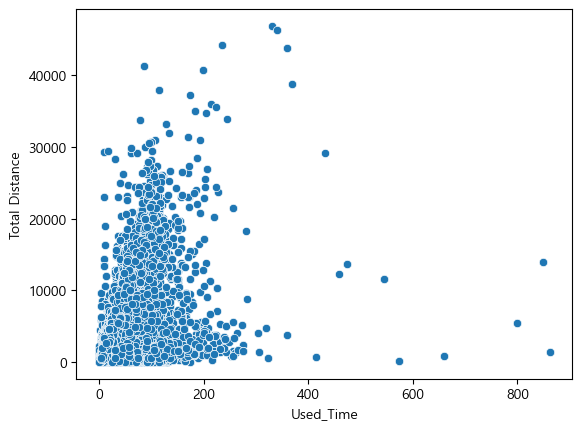

In [11]:
### 사용시간대별 총 이용시간의 시각화
sns.scatterplot(data=df_1, x='Used_Time', y='Total Distance')
plt.show()


## 서울시 따릉이 일별 이용 현황(20240105)

In [12]:
file_path2 = 'D:\Code\(최종)따릉이/tpss_bcycl_od_statnhm_20240105.csv'

df_2 = pd.read_csv(file_path2, encoding='cp949')

print(f'20240105 데이터프레임 : \n{df_2}')

df_2.isnull().sum()

20240105 데이터프레임 : 
           기준_날짜 집계_기준  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID      종료_대여소명  \
0       20240105  출발시간       0   ST-1033  불광2동_017_1    ST-475   불광1동_014_1   
1       20240105  출발시간       0   ST-1041  성내1동_033_1    ST-494     길동_085_2   
2       20240105  출발시간       0   ST-1061  천호1동_039_1   ST-1061   천호1동_039_1   
3       20240105  출발시간       0   ST-1070  송파1동_010_1   ST-1729    삼전동_046_1   
4       20240105  출발시간       0   ST-1072  가락2동_010_1   ST-1408    오금동_037_1   
...          ...   ...     ...       ...         ...       ...          ...   
188361  20240105  도착시간    2355    ST-950   조원동_032_1   ST-2375    대학동_008_1   
188362  20240105  도착시간    2355    ST-965  낙성대동_007_2   ST-2373    은천동_065_2   
188363  20240105  도착시간    2355    ST-968  성산2동_039_1     ST-35  북가좌2동_020_1   
188364  20240105  도착시간    2355    ST-980  자양2동_039_1   ST-2308    화양동_041_2   
188365  20240105  도착시간    2355    ST-983  중곡1동_022_1    ST-983   중곡1동_022_1   

        전체_건수  전체_이용_분  전체_이용_거리

기준_날짜          0
집계_기준          0
기준_시간대         0
시작_대여소_ID      0
시작_대여소명        0
종료_대여소_ID      0
종료_대여소명      737
전체_건수          0
전체_이용_분        0
전체_이용_거리       0
dtype: int64

In [13]:
df_2.drop(columns=['종료_대여소명'],inplace=True)

print(df_2)

           기준_날짜 집계_기준  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID  전체_건수  \
0       20240105  출발시간       0   ST-1033  불광2동_017_1    ST-475      1   
1       20240105  출발시간       0   ST-1041  성내1동_033_1    ST-494      1   
2       20240105  출발시간       0   ST-1061  천호1동_039_1   ST-1061      1   
3       20240105  출발시간       0   ST-1070  송파1동_010_1   ST-1729      2   
4       20240105  출발시간       0   ST-1072  가락2동_010_1   ST-1408      1   
...          ...   ...     ...       ...         ...       ...    ...   
188361  20240105  도착시간    2355    ST-950   조원동_032_1   ST-2375      1   
188362  20240105  도착시간    2355    ST-965  낙성대동_007_2   ST-2373      1   
188363  20240105  도착시간    2355    ST-968  성산2동_039_1     ST-35      1   
188364  20240105  도착시간    2355    ST-980  자양2동_039_1   ST-2308      1   
188365  20240105  도착시간    2355    ST-983  중곡1동_022_1    ST-983      1   

        전체_이용_분  전체_이용_거리  
0             3       506  
1            20      2072  
2             0        10  
3          

### 불필요한 컬럼 제거

In [14]:
columns = df_2.columns
print(columns)

Index(['기준_날짜', '집계_기준', '기준_시간대', '시작_대여소_ID', '시작_대여소명', '종료_대여소_ID',
       '전체_건수', '전체_이용_분', '전체_이용_거리'],
      dtype='object')


In [15]:
df_2.drop(columns=['집계_기준', '전체_건수'],inplace=True)
print(df_2)

           기준_날짜  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID  전체_이용_분  전체_이용_거리
0       20240105       0   ST-1033  불광2동_017_1    ST-475        3       506
1       20240105       0   ST-1041  성내1동_033_1    ST-494       20      2072
2       20240105       0   ST-1061  천호1동_039_1   ST-1061        0        10
3       20240105       0   ST-1070  송파1동_010_1   ST-1729       15      2156
4       20240105       0   ST-1072  가락2동_010_1   ST-1408       10      1054
...          ...     ...       ...         ...       ...      ...       ...
188361  20240105    2355    ST-950   조원동_032_1   ST-2375       45      5035
188362  20240105    2355    ST-965  낙성대동_007_2   ST-2373        7       993
188363  20240105    2355    ST-968  성산2동_039_1     ST-35       12      1930
188364  20240105    2355    ST-980  자양2동_039_1   ST-2308        8      1603
188365  20240105    2355    ST-983  중곡1동_022_1    ST-983        0        10

[188366 rows x 7 columns]


### 한글 컬럼을 영문컬럼으로 변경

In [16]:
df_2.columns=['Date', 'Time', 'PlaceID', 'StartPlace', 'EndPlaceID', 'Used_Time', 'Total Distance']

print(df_2.columns)

print(df_2)

df_2.isnull().sum()

Index(['Date', 'Time', 'PlaceID', 'StartPlace', 'EndPlaceID', 'Used_Time',
       'Total Distance'],
      dtype='object')
            Date  Time  PlaceID  StartPlace EndPlaceID  Used_Time  \
0       20240105     0  ST-1033  불광2동_017_1     ST-475          3   
1       20240105     0  ST-1041  성내1동_033_1     ST-494         20   
2       20240105     0  ST-1061  천호1동_039_1    ST-1061          0   
3       20240105     0  ST-1070  송파1동_010_1    ST-1729         15   
4       20240105     0  ST-1072  가락2동_010_1    ST-1408         10   
...          ...   ...      ...         ...        ...        ...   
188361  20240105  2355   ST-950   조원동_032_1    ST-2375         45   
188362  20240105  2355   ST-965  낙성대동_007_2    ST-2373          7   
188363  20240105  2355   ST-968  성산2동_039_1      ST-35         12   
188364  20240105  2355   ST-980  자양2동_039_1    ST-2308          8   
188365  20240105  2355   ST-983  중곡1동_022_1     ST-983          0   

        Total Distance  
0                  506 

Date              0
Time              0
PlaceID           0
StartPlace        0
EndPlaceID        0
Used_Time         0
Total Distance    0
dtype: int64

In [17]:
print(f'1월 5일 데이터프레임 : \n{df_2}')

1월 5일 데이터프레임 : 
            Date  Time  PlaceID  StartPlace EndPlaceID  Used_Time  \
0       20240105     0  ST-1033  불광2동_017_1     ST-475          3   
1       20240105     0  ST-1041  성내1동_033_1     ST-494         20   
2       20240105     0  ST-1061  천호1동_039_1    ST-1061          0   
3       20240105     0  ST-1070  송파1동_010_1    ST-1729         15   
4       20240105     0  ST-1072  가락2동_010_1    ST-1408         10   
...          ...   ...      ...         ...        ...        ...   
188361  20240105  2355   ST-950   조원동_032_1    ST-2375         45   
188362  20240105  2355   ST-965  낙성대동_007_2    ST-2373          7   
188363  20240105  2355   ST-968  성산2동_039_1      ST-35         12   
188364  20240105  2355   ST-980  자양2동_039_1    ST-2308          8   
188365  20240105  2355   ST-983  중곡1동_022_1     ST-983          0   

        Total Distance  
0                  506  
1                 2072  
2                   10  
3                 2156  
4                 1054  
...  

## EDA

In [18]:
### 사용시간대별 총 이동거리의 시각화
#sns.kdeplot(data=df_1, x='Time', hue='Total Distance')
#plt.show()


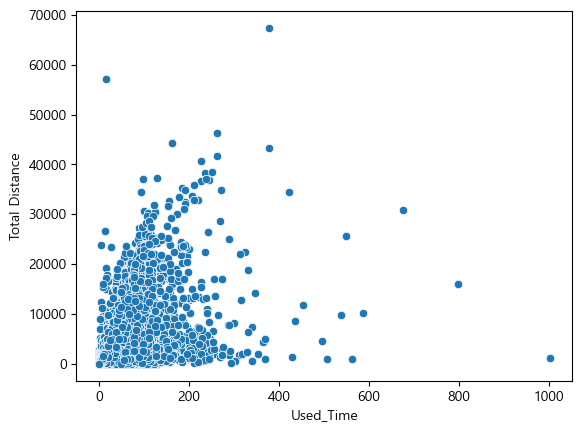

In [19]:
### 사용시간대별 총 이용시간의 시각화
sns.scatterplot(data=df_2, x='Used_Time', y='Total Distance')
plt.show()


## 서울시 따릉이 일별 이용 현황(20240106)

In [20]:
file_path3 = 'D:\Code\(최종)따릉이/tpss_bcycl_od_statnhm_20240106.csv'

df_3 = pd.read_csv(file_path3, encoding='cp949')

print(f'20240106 데이터프레임 : \n{df_3}')

# 결측치 확인

df_3.isnull().sum()

20240106 데이터프레임 : 
           기준_날짜 집계_기준  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID     종료_대여소명  \
0       20240106  출발시간       0   ST-1005  신정1동_027_1   ST-2760  신정2동_006_1   
1       20240106  출발시간       0   ST-1010  신월3동_007_1    ST-835  발산1동_001_1   
2       20240106  출발시간       0   ST-1015   목5동_001_1    ST-309   목4동_040_1   
3       20240106  출발시간       0   ST-1017   목5동_059_1   ST-1495   목5동_013_1   
4       20240106  출발시간       0    ST-102  자양1동_003_1    ST-988  자양3동_029_1   
...          ...   ...     ...       ...         ...       ...         ...   
112737  20240106  도착시간    2355    ST-884   중앙동_009_1   ST-1548   은천동_065_1   
112738  20240106  도착시간    2355    ST-913  월계3동_039_1   ST-2708  월계2동_025_1   
112739  20240106  도착시간    2355    ST-919  고척1동_006_1   ST-1227  개봉1동_050_1   
112740  20240106  도착시간    2355     ST-93   상암동_026_4     ST-43   신촌동_030_2   
112741  20240106  도착시간    2355    ST-950   조원동_032_1    ST-709   미성동_014_1   

        전체_건수  전체_이용_분  전체_이용_거리  
0        

기준_날짜          0
집계_기준          0
기준_시간대         0
시작_대여소_ID      0
시작_대여소명        0
종료_대여소_ID      0
종료_대여소명      455
전체_건수          0
전체_이용_분        0
전체_이용_거리       0
dtype: int64

In [21]:
df_3.drop(columns=['종료_대여소명'],inplace=True)

print(df_3)

           기준_날짜 집계_기준  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID  전체_건수  \
0       20240106  출발시간       0   ST-1005  신정1동_027_1   ST-2760      1   
1       20240106  출발시간       0   ST-1010  신월3동_007_1    ST-835      1   
2       20240106  출발시간       0   ST-1015   목5동_001_1    ST-309      1   
3       20240106  출발시간       0   ST-1017   목5동_059_1   ST-1495      1   
4       20240106  출발시간       0    ST-102  자양1동_003_1    ST-988      1   
...          ...   ...     ...       ...         ...       ...    ...   
112737  20240106  도착시간    2355    ST-884   중앙동_009_1   ST-1548      1   
112738  20240106  도착시간    2355    ST-913  월계3동_039_1   ST-2708      1   
112739  20240106  도착시간    2355    ST-919  고척1동_006_1   ST-1227      1   
112740  20240106  도착시간    2355     ST-93   상암동_026_4     ST-43      1   
112741  20240106  도착시간    2355    ST-950   조원동_032_1    ST-709      1   

        전체_이용_분  전체_이용_거리  
0             6      1709  
1            19      2350  
2             9      2470  
3          

### 불필요한 컬럼 제거

In [22]:
columns = df_3.columns
print(columns)

Index(['기준_날짜', '집계_기준', '기준_시간대', '시작_대여소_ID', '시작_대여소명', '종료_대여소_ID',
       '전체_건수', '전체_이용_분', '전체_이용_거리'],
      dtype='object')


In [23]:
df_3.drop(columns=['집계_기준', '전체_건수'],inplace=True)
print(df_3)

           기준_날짜  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID  전체_이용_분  전체_이용_거리
0       20240106       0   ST-1005  신정1동_027_1   ST-2760        6      1709
1       20240106       0   ST-1010  신월3동_007_1    ST-835       19      2350
2       20240106       0   ST-1015   목5동_001_1    ST-309        9      2470
3       20240106       0   ST-1017   목5동_059_1   ST-1495        4       606
4       20240106       0    ST-102  자양1동_003_1    ST-988        7      1236
...          ...     ...       ...         ...       ...      ...       ...
112737  20240106    2355    ST-884   중앙동_009_1   ST-1548        6       960
112738  20240106    2355    ST-913  월계3동_039_1   ST-2708        9      1569
112739  20240106    2355    ST-919  고척1동_006_1   ST-1227        6       353
112740  20240106    2355     ST-93   상암동_026_4     ST-43       37      4579
112741  20240106    2355    ST-950   조원동_032_1    ST-709       11      1878

[112742 rows x 7 columns]


### 한글 컬럼을 영문컬럼으로 변경

In [24]:
df_3.columns=['Date', 'Time', 'PlaceID', 'StartPlace', 'EndPlaceID', 'Used_Time', 'Total Distance']

print(df_3.columns)

print(df_3)

df_3.isnull().sum()

Index(['Date', 'Time', 'PlaceID', 'StartPlace', 'EndPlaceID', 'Used_Time',
       'Total Distance'],
      dtype='object')
            Date  Time  PlaceID  StartPlace EndPlaceID  Used_Time  \
0       20240106     0  ST-1005  신정1동_027_1    ST-2760          6   
1       20240106     0  ST-1010  신월3동_007_1     ST-835         19   
2       20240106     0  ST-1015   목5동_001_1     ST-309          9   
3       20240106     0  ST-1017   목5동_059_1    ST-1495          4   
4       20240106     0   ST-102  자양1동_003_1     ST-988          7   
...          ...   ...      ...         ...        ...        ...   
112737  20240106  2355   ST-884   중앙동_009_1    ST-1548          6   
112738  20240106  2355   ST-913  월계3동_039_1    ST-2708          9   
112739  20240106  2355   ST-919  고척1동_006_1    ST-1227          6   
112740  20240106  2355    ST-93   상암동_026_4      ST-43         37   
112741  20240106  2355   ST-950   조원동_032_1     ST-709         11   

        Total Distance  
0                 1709 

Date              0
Time              0
PlaceID           0
StartPlace        0
EndPlaceID        0
Used_Time         0
Total Distance    0
dtype: int64

In [25]:
print(f'1월 5일 데이터프레임 : \n{df_3}')

1월 5일 데이터프레임 : 
            Date  Time  PlaceID  StartPlace EndPlaceID  Used_Time  \
0       20240106     0  ST-1005  신정1동_027_1    ST-2760          6   
1       20240106     0  ST-1010  신월3동_007_1     ST-835         19   
2       20240106     0  ST-1015   목5동_001_1     ST-309          9   
3       20240106     0  ST-1017   목5동_059_1    ST-1495          4   
4       20240106     0   ST-102  자양1동_003_1     ST-988          7   
...          ...   ...      ...         ...        ...        ...   
112737  20240106  2355   ST-884   중앙동_009_1    ST-1548          6   
112738  20240106  2355   ST-913  월계3동_039_1    ST-2708          9   
112739  20240106  2355   ST-919  고척1동_006_1    ST-1227          6   
112740  20240106  2355    ST-93   상암동_026_4      ST-43         37   
112741  20240106  2355   ST-950   조원동_032_1     ST-709         11   

        Total Distance  
0                 1709  
1                 2350  
2                 2470  
3                  606  
4                 1236  
...  

## EDA

In [26]:
### 사용시간대별 총 이동거리의 시각화
#sns.kdeplot(data=df_1, x='Time', hue='Total Distance')
#plt.show()


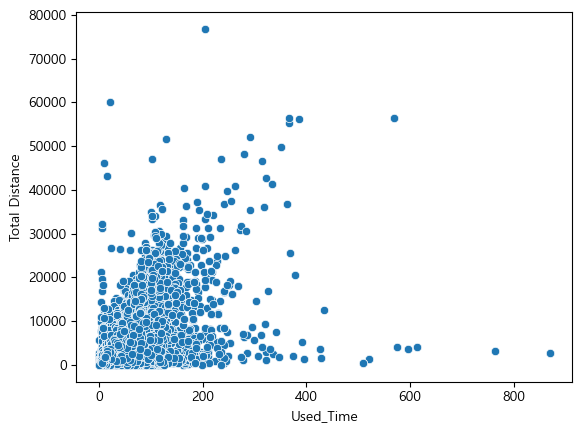

In [27]:
### 사용시간대별 총 이용시간의 시각화
sns.scatterplot(data=df_3, x='Used_Time', y='Total Distance')
plt.show()
